# Explore CMIP6 data on Casper

Ensure you have the required libraries installed, these will make it much easier to work with the data

In [1]:
! pip install netcdf4 'xarray[io]' cartopy nc-time-axis

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 90.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 40.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 KB 1.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 KB 311.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 53.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 338.0 kB/s eta

In [11]:
import pandas as pd
import xarray as xr
import numpy as np
import os.path

import matplotlib.pyplot as plt
# Useful for plotting maps
import cartopy.crs as ccrs

# This can be useful for working with multiple processors - to be explored later on
# from dask.distributed import Client, LocalCluster

Output data is in `/glade/collections/cmip/CMIP6/{activity}/NCC/NorESM2-LM/{experiment}`

You can also find other model data here, in particular the NCAR model:
Example path: `/glade/collections/cmip/CMIP6/DAMIP/NCAR/CESM2/hist-aer/r1i1p1f1/Amon/tas/gn/latest/*.nc`



Input data is in: `/glade/p/cesmdata/cseg/inputdata/atm/cam/chem/emis/`

The model names are not very obvious but you can either google them, ask ChatGPT, or look them up in these structured dictionaries: https://github.com/PCMDI/cmip6-cmor-tables/tree/main/Tables (which can be queried with e.g. Pandas)

In [12]:
def get_MIP(experiment):
    """
    Utility function to get teh activity associated with a particular experiment
    """
    if experiment == 'ssp245-covid':
        return 'DAMIP'
    elif experiment == 'ssp370-lowNTCF':
        return 'AerChemMIP'
    elif experiment.startswith('ssp'):
        return 'ScenarioMIP'
    elif experiment.startswith('hist-'):
        return 'DAMIP'
    else:
        return 'CMIP'


In [13]:
def get_data(variable, experiment, member):
    """
    Read a particular CMIP6 (Amon) variable from NorESM2
    """
    import glob
    files = glob.glob(f"/glade/collections/cmip/CMIP6/{get_MIP(experiment)}/NCC/NorESM2-LM/{experiment}/{member}/Amon/{variable}/gn/v20190815/{variable}/*.nc")
    return xr.open_mfdataset(files)[variable]

In [14]:
tas = get_data('tas', 'historical', 'r1i1p1f1')

In [15]:
tas

<xarray.DataArray 'tas' (time: 1980, lat: 96, lon: 144)>
dask.array<concatenate, shape=(1980, 96, 144), dtype=float32, chunksize=(1, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 2.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    original_name:  TREFHT
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-15T12:42:20Z altered by CMOR: Treated scalar dime...

In [146]:
list(data_m.data_vars.keys())

['tas', 'time_bnds', 'lat_bnds', 'lon_bnds']

In [147]:
data

<xarray.DataArray 'tas' (time: 1980, lat: 192, lon: 288)>
dask.array<concatenate, shape=(1980, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
Attributes: (12/19)
    cell_measures:  area: areacella
    cell_methods:   area: time: mean
    comment:        TREFHT
    description:    near-surface (usually, 2 meter) air temperature
    frequency:      mon
    id:             tas
    ...             ...
    time_label:     time-mean
    time_title:     Temporal mean
    title:          Near-Surface Air Temperature
    type:           real
    units:          K
    variable_id:    tas

*Note*, the ensemble member format: 
`r` for realization, `i` for initialization, `p` for physics, and `f` for forcing

We're only interested in different realizations in this project, so try different r numbers but keep the rest the same: E.g.: `r1i1p1f1`, `r2i1p1f1`, `r3i1p1f1`

In [148]:
# When averaging gridded data on a sphere, we need to account for the fact that the values near the poles have less area
weights = np.cos(np.deg2rad(tas.lat))
weights.name = "weights"

tas_timeseries = tas.weighted(weights).mean(['lat', 'lon'])

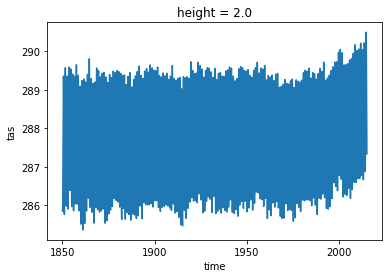

In [149]:
tas_timeseries.plot()

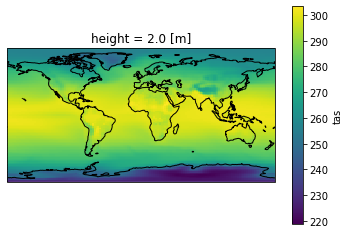

In [150]:
# Plot a map of the average temperature between 1850-1900

tas.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)

# Feel free to explore other projections here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

plt.gca().coastlines()

Text(0.5, 1.0, 'Mean global temperature between 2005-2015')

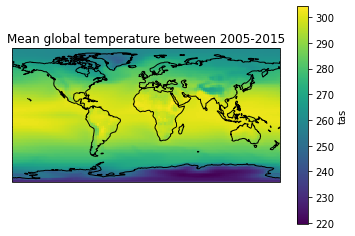

In [151]:
# Plot a map of the average temperature between 2005-2015

tas.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)

# Feel free to explore other projections here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

plt.gca().coastlines()
plt.title('Mean global temperature between 2005-2015')

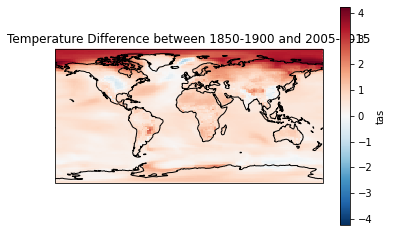

In [166]:
temp_1850 = tas.sel(time=slice('1850', '1900')).mean('time')
temp_2005 = tas.sel(time=slice('2005', '2015')).mean('time')
diff = temp_2005 - temp_1850
diff.plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)

plt.gca().coastlines()
plt.title('Temperature Difference between 1850-1900 and 2005-2015')
plt.show()

In [153]:
pr = get_data('pr', 'historical', 'r1i1p1f1')

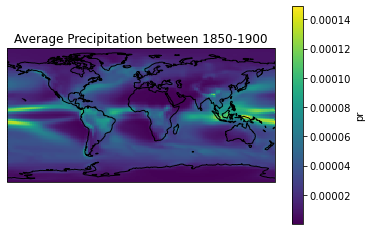

In [167]:
pr.sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.gca().coastlines()
plt.title('Average Precipitation between 1850-1900')
plt.show()

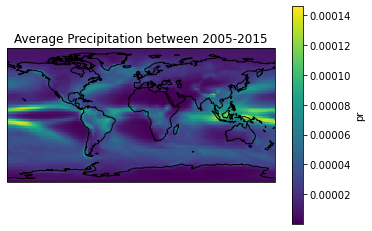

In [169]:
pr.sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.gca().coastlines()
plt.title('Average Precipitation between 2005-2015')
plt.show()

In [156]:
prec_1850 = pr.sel(time=slice('1850','1900')).mean('time')
prec_2005 = pr.sel(time=slice('2005','2015')).mean('time')
diff_prec = prec_2005 - prec_1850

Text(0.5, 1.0, 'Precipitation Difference 1850-1900 vs 2005-2015')

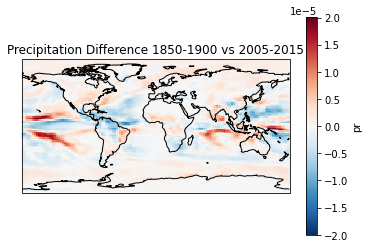

In [170]:
diff_prec.plot(
    transform=ccrs.PlateCarree(),
    subplot_kws={"projection": ccrs.PlateCarree()},
)
plt.gca().coastlines()
plt.title('Precipitation Difference 1850-1900 vs 2005-2015')

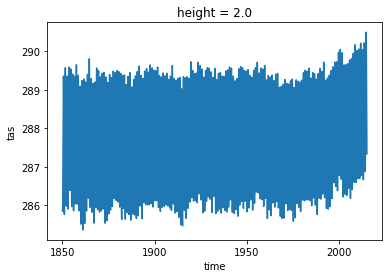

In [158]:
# When averaging gridded data on a sphere, we need to account for the fact that the values near the poles have less area
weights_tas = np.cos(np.deg2rad(tas.lat))
weights_tas.name = "weights"

tas_timeseries = tas.weighted(weights_tas).mean(['lat', 'lon'])
tas_timeseries.plot()

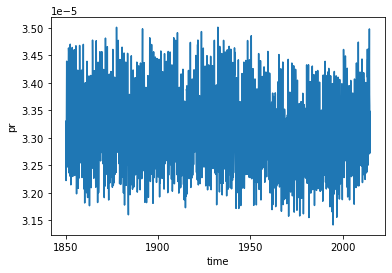

In [159]:
# When averaging gridded data on a sphere, we need to account for the fact that the values near the poles have less area
weights_pr = np.cos(np.deg2rad(pr.lat))
weights_pr.name = "weights"

pr_timeseries = pr.weighted(weights_pr).mean(['lat', 'lon'])
pr_timeseries.plot()

In [160]:
hum

,Array,Chunk
Bytes,1.94 GiB,1.00 MiB
Shape,"(1980, 19, 96, 144)","(1, 19, 96, 144)"
Count,3977 Tasks,1980 Chunks
Type,float32,numpy.ndarray


In [163]:
hum = get_data('hus', 'historical', 'r1i1p1f1')

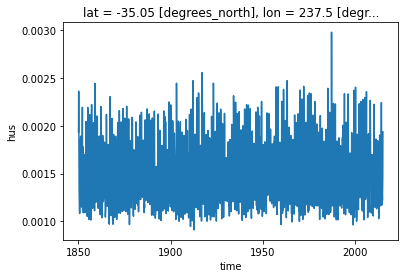

In [182]:
hum.isel(lat=29, lon=95).mean('plev').plot()

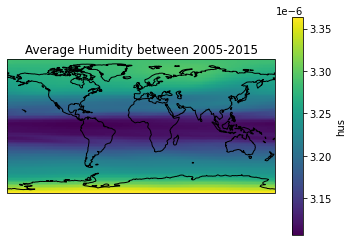

In [187]:
hum.isel(plev=-1).sel(time=slice('2005','2015')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.gca().coastlines()
plt.title('Average Humidity between 2005-2015')
plt.show()

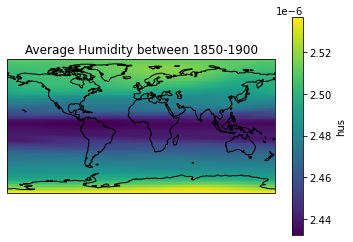

In [189]:
hum.isel(plev=-1).sel(time=slice('1850','1900')).mean('time').plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.gca().coastlines()
plt.title('Average Humidity between 1850-1900')
plt.show()

In [194]:
hum_1850 = hum.isel(plev=-1).sel(time=slice('1850','1900')).mean('time')
hum_2005 = hum.isel(plev=-1).sel(time=slice('2005','2015')).mean('time')
diff_hum = hum_2005 - hum_1850

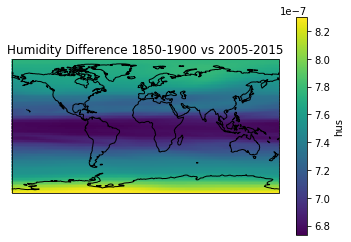

In [195]:
diff_hum.plot(
    transform=ccrs.PlateCarree(), # This is the projection the data is stored as
    subplot_kws={"projection": ccrs.PlateCarree()}, # This describes the projection to plot onto (which happens to be the projection the data is already in so no transformation is needed in this case)
)
plt.gca().coastlines()
plt.title('Humidity Difference 1850-1900 vs 2005-2015')
plt.show()

In [185]:
hum.sel(time=slice('2005','2015')).mean('time')

<xarray.DataArray 'hus' (plev: 19, lat: 96, lon: 144)>
dask.array<mean_agg-aggregate, shape=(19, 96, 144), dtype=float32, chunksize=(19, 96, 144), chunktype=numpy.ndarray>
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5